In [1]:
import tensorflow as tf

Matplotlib is building the font cache; this may take a moment.


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# scale the pixel intensities down to the 0-1 range and convert them to floats
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

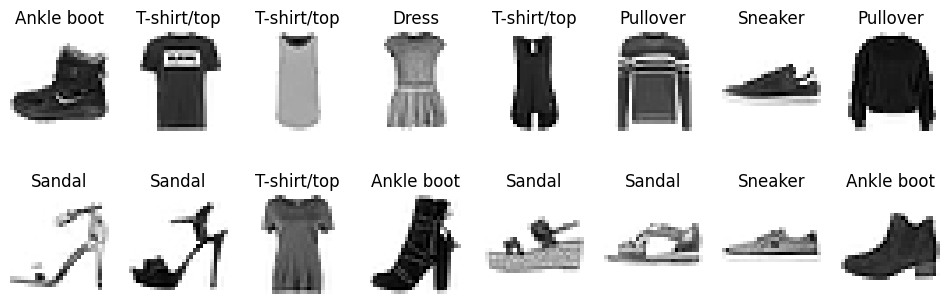

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
  "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

import matplotlib.pyplot as plt
def plot_image(X):
	# format the plot into n rows and 8 columns
	ncol = 8
	nrow = len(X) // ncol + 1
	plt.figure(figsize=(ncol*1.5, nrow*2))
	for index, image in enumerate(X):
		plt.subplot(nrow, ncol, index+1)
		plt.imshow(image, cmap="binary", interpolation="nearest")
		plt.axis('off')
		plt.title(class_names[y_train[index]], fontsize=12)
	plt.show()

plot_image(X_train[:16])

In [4]:
from pathlib import Path 
from time import strftime

# %load_ext tensorboard
# %tensorboard --logdir=./my_logs


tf.random.set_seed(42)

def get_run_logdir(root_logdir="my_logs"):
	return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")


model = tf.keras.models.Sequential([
	tf.keras.layers.Flatten(input_shape=[28, 28]),
	tf.keras.layers.Dense(300, activation="relu"),
	tf.keras.layers.Dense(100, activation="relu"),
	tf.keras.layers.Dense(10, activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy",
			  optimizer="sgd",
			  metrics=["accuracy"])

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(get_run_logdir())

history = model.fit(X_train, y_train, epochs=30,
					validation_data=(X_valid, y_valid),
					callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb]
					)

model.save_weights("my_model_weights.h5")
# model.load_weights("my_model_weights.h5")



Epoch 1/30
1719/1719 [==============================] - 1s 802us/step - loss: 0.7158 - accuracy: 0.7671 - val_loss: 0.5114 - val_accuracy: 0.8260
Epoch 2/30
1719/1719 [==============================] - 1s 758us/step - loss: 0.4864 - accuracy: 0.8324 - val_loss: 0.4654 - val_accuracy: 0.8332
Epoch 3/30
1719/1719 [==============================] - 1s 761us/step - loss: 0.4406 - accuracy: 0.8462 - val_loss: 0.4272 - val_accuracy: 0.8498
Epoch 4/30
1719/1719 [==============================] - 1s 745us/step - loss: 0.4162 - accuracy: 0.8544 - val_loss: 0.3968 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 1s 752us/step - loss: 0.3959 - accuracy: 0.8613 - val_loss: 0.3916 - val_accuracy: 0.8604
Epoch 6/30
1719/1719 [==============================] - 1s 747us/step - loss: 0.3794 - accuracy: 0.8659 - val_loss: 0.4022 - val_accuracy: 0.8626
Epoch 7/30
1719/1719 [==============================] - 1s 774us/step - loss: 0.3670 - accuracy: 0.8691 - val_loss: 0.3770 -

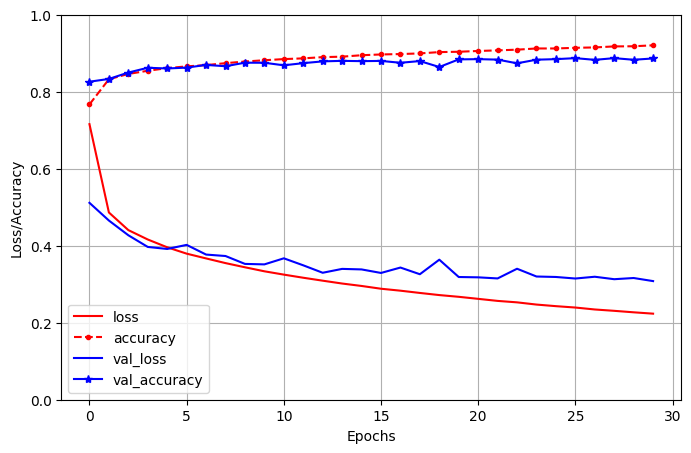

In [5]:
# plot the learning curves

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5), grid=True, ylim=(0, 1), xlabel="Epochs", 
								  ylabel="Loss/Accuracy",
								  style=['r-', 'r--.', 'b-', 'b-*'])

plt.show()


1/1 [==============================] - 0s 8ms/step
Predicted classes: [9 2 1 1 6 1 4 6 5 7]
Actual classes:    [9 2 1 1 6 1 4 6 5 7]


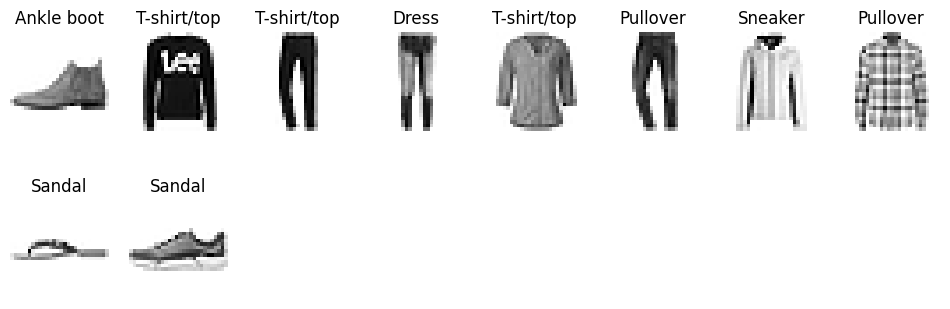

In [6]:

# evaluate the model on the test set

model.evaluate(X_test, y_test)

X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)

print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:10])

plot_image(X_new)


In [7]:
# Wide and Deep Neural Network

flatten_layer = tf.keras.layers.Flatten(input_shape=[28, 28])
hidden_layer1 = tf.keras.layers.Dense(100, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(100, activation="relu")
hidden_layer3 = tf.keras.layers.Dense(10, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(10, activation="softmax")

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
flatten = flatten_layer(input_)
hidden1 = hidden_layer1(flatten)
hidden2 = hidden_layer2(hidden1)
hidden3 = hidden_layer3(hidden2)
concat = concat_layer([flatten, hidden3])
output = output_layer(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20,
					validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)


Epoch 1/20
1719/1719 [==============================] - 1s 634us/step - loss: 0.8382 - accuracy: 0.7373 - val_loss: 0.6265 - val_accuracy: 0.7982
Epoch 2/20
1719/1719 [==============================] - 1s 607us/step - loss: 0.5963 - accuracy: 0.8060 - val_loss: 0.5500 - val_accuracy: 0.8200
Epoch 3/20
1719/1719 [==============================] - 1s 616us/step - loss: 0.5410 - accuracy: 0.8214 - val_loss: 0.5086 - val_accuracy: 0.8286
Epoch 4/20
1719/1719 [==============================] - 1s 599us/step - loss: 0.5088 - accuracy: 0.8310 - val_loss: 0.4836 - val_accuracy: 0.8364
Epoch 5/20
1719/1719 [==============================] - 1s 622us/step - loss: 0.4849 - accuracy: 0.8373 - val_loss: 0.4640 - val_accuracy: 0.8410
Epoch 6/20
1719/1719 [==============================] - 1s 599us/step - loss: 0.4664 - accuracy: 0.8416 - val_loss: 0.4620 - val_accuracy: 0.8382
Epoch 7/20
1719/1719 [==============================] - 1s 602us/step - loss: 0.4516 - accuracy: 0.8456 - val_loss: 0.4405 -

[0.3847738802433014, 0.8644999861717224]

In [8]:

# regression

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
	norm_layer,
	tf.keras.layers.Dense(50, activation="relu"),
	tf.keras.layers.Dense(50, activation="relu"),
	tf.keras.layers.Dense(50, activation="relu"),
	tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics= ["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))




Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.5655 - root_mean_squared_error: 2.9267 - val_loss: 8.4192 - val_root_mean_squared_error: 2.9017
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.3048 - root_mean_squared_error: 2.8818 - val_loss: 8.3923 - val_root_mean_squared_error: 2.8971
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2858 - root_mean_squared_error: 2.8785 - val_loss: 8.4137 - val_root_mean_squared_error: 2.9008
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2797 - root_mean_squared_error: 2.8774 - val_loss: 8.4571 - val_root_mean_squared_error: 2.9082
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2722 - root_mean_squared_error: 2.8762 - val_loss: 8.3924 - val_root_mean_squared_error: 2.8972
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 8.2624 - root_mean_squared_error: 2.8745 - val_loss: 8

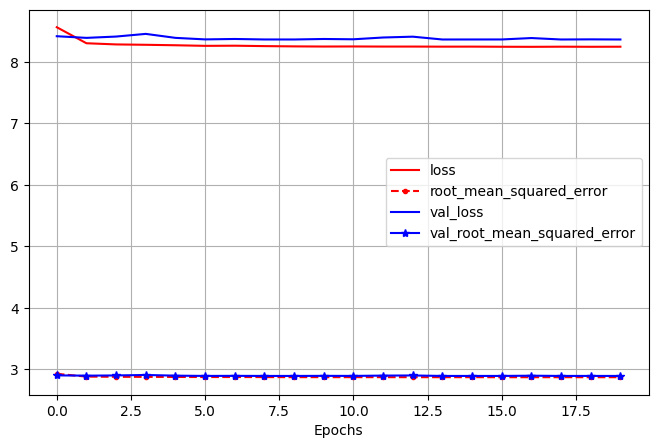

1/1 [==============================] - 0s 46ms/step


In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5), grid=True, xlabel="Epochs",
								  style=['r-', 'r--.', 'b-', 'b-*'])
plt.show()

model.evaluate(X_test, y_test)

X_new = X_test[:10]
y_pred = model.predict(X_new)